In [1]:
!pip install plotly

In [2]:
# Installing category_encoders to import TargetEncoder

!pip install category_encoders

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### To Start we need to load the data

In [4]:
data = pd.read_csv("avocado.csv")

### 1st : Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.shape

(18249, 14)

In [7]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Unnamed:0, looks like an identifier column and that's why it is not of 'Significance'. So, we can remove it.

In [9]:
data.drop(data.columns[0], axis=1, inplace=True)

In [10]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Now, once again we see the shape of the data.

In [11]:
data.shape

(18249, 13)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


So, now we have much information about the data. Like all the coulmns have full data. In all there are 13 columns and 18249 rows. 

Besides that, we also know that there are 10 columns with Numerical values and 3 are Categorical.

Since there are 3 Columns of Categorical values we need to encode them.

In [13]:
data.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Now we have the knowledge about UNIQUE values of each column. 

Some more Insights : 

In [14]:
data.skew()

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Data seems to be Highly Skewed for almost all the columns.

In [15]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


From the description of the data showing above, we can say that all the columns have count equal to 18249. Mean and Median have high difference except for Average price stating that data has high skewness present. There is high variance in all the columns except for Average price and year column. Difference between min, max and interquartile ranges is uneven hence there are a no. of outliers present in the data   

### Some Visualization

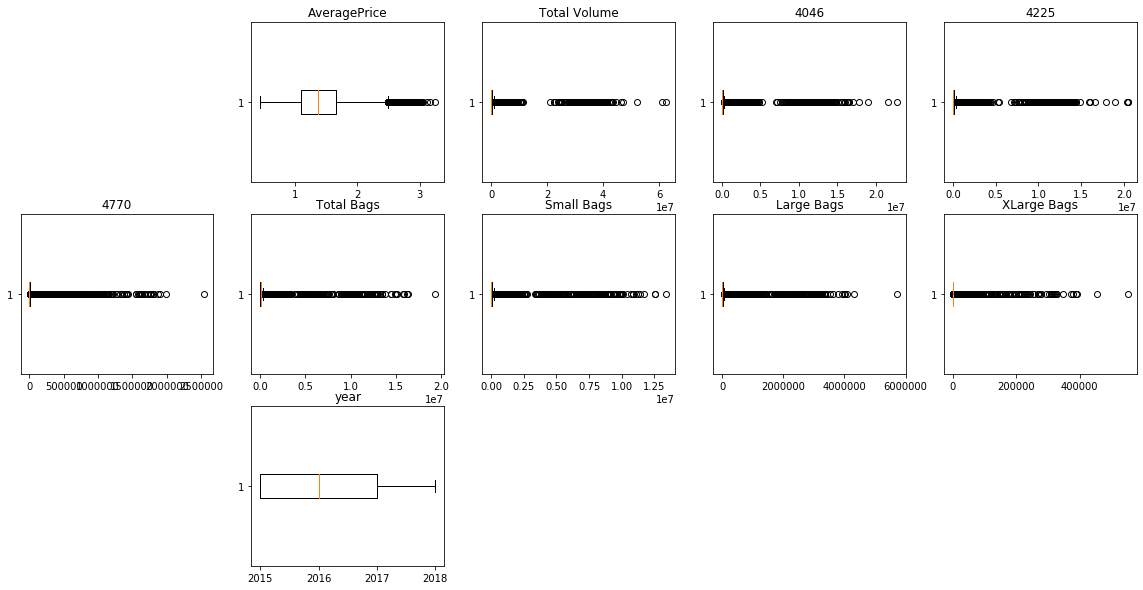

In [16]:
plt.figure(figsize=(20,10))

for i in range(len(data.columns)):
    if data.dtypes[i] !='object':
        plt.subplot(3,5,i+1)
        plt.boxplot(data[data.columns[i]], vert=False)
        plt.title(data.columns[i])
        
plt.show()

In [17]:
data['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

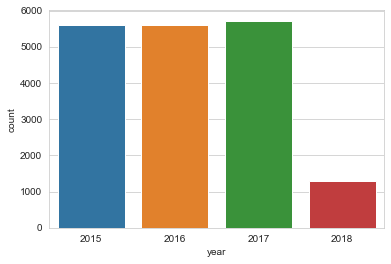

In [18]:
sns.set_style('whitegrid')
sns.countplot(x="year", data=data)

In [19]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

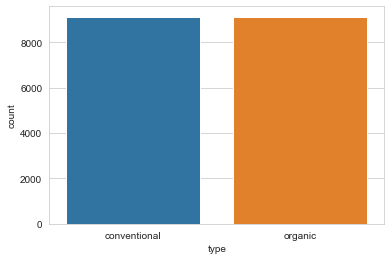

In [20]:
sns.set_style('whitegrid')
sns.countplot(x="type", data=data)

In [21]:
data['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

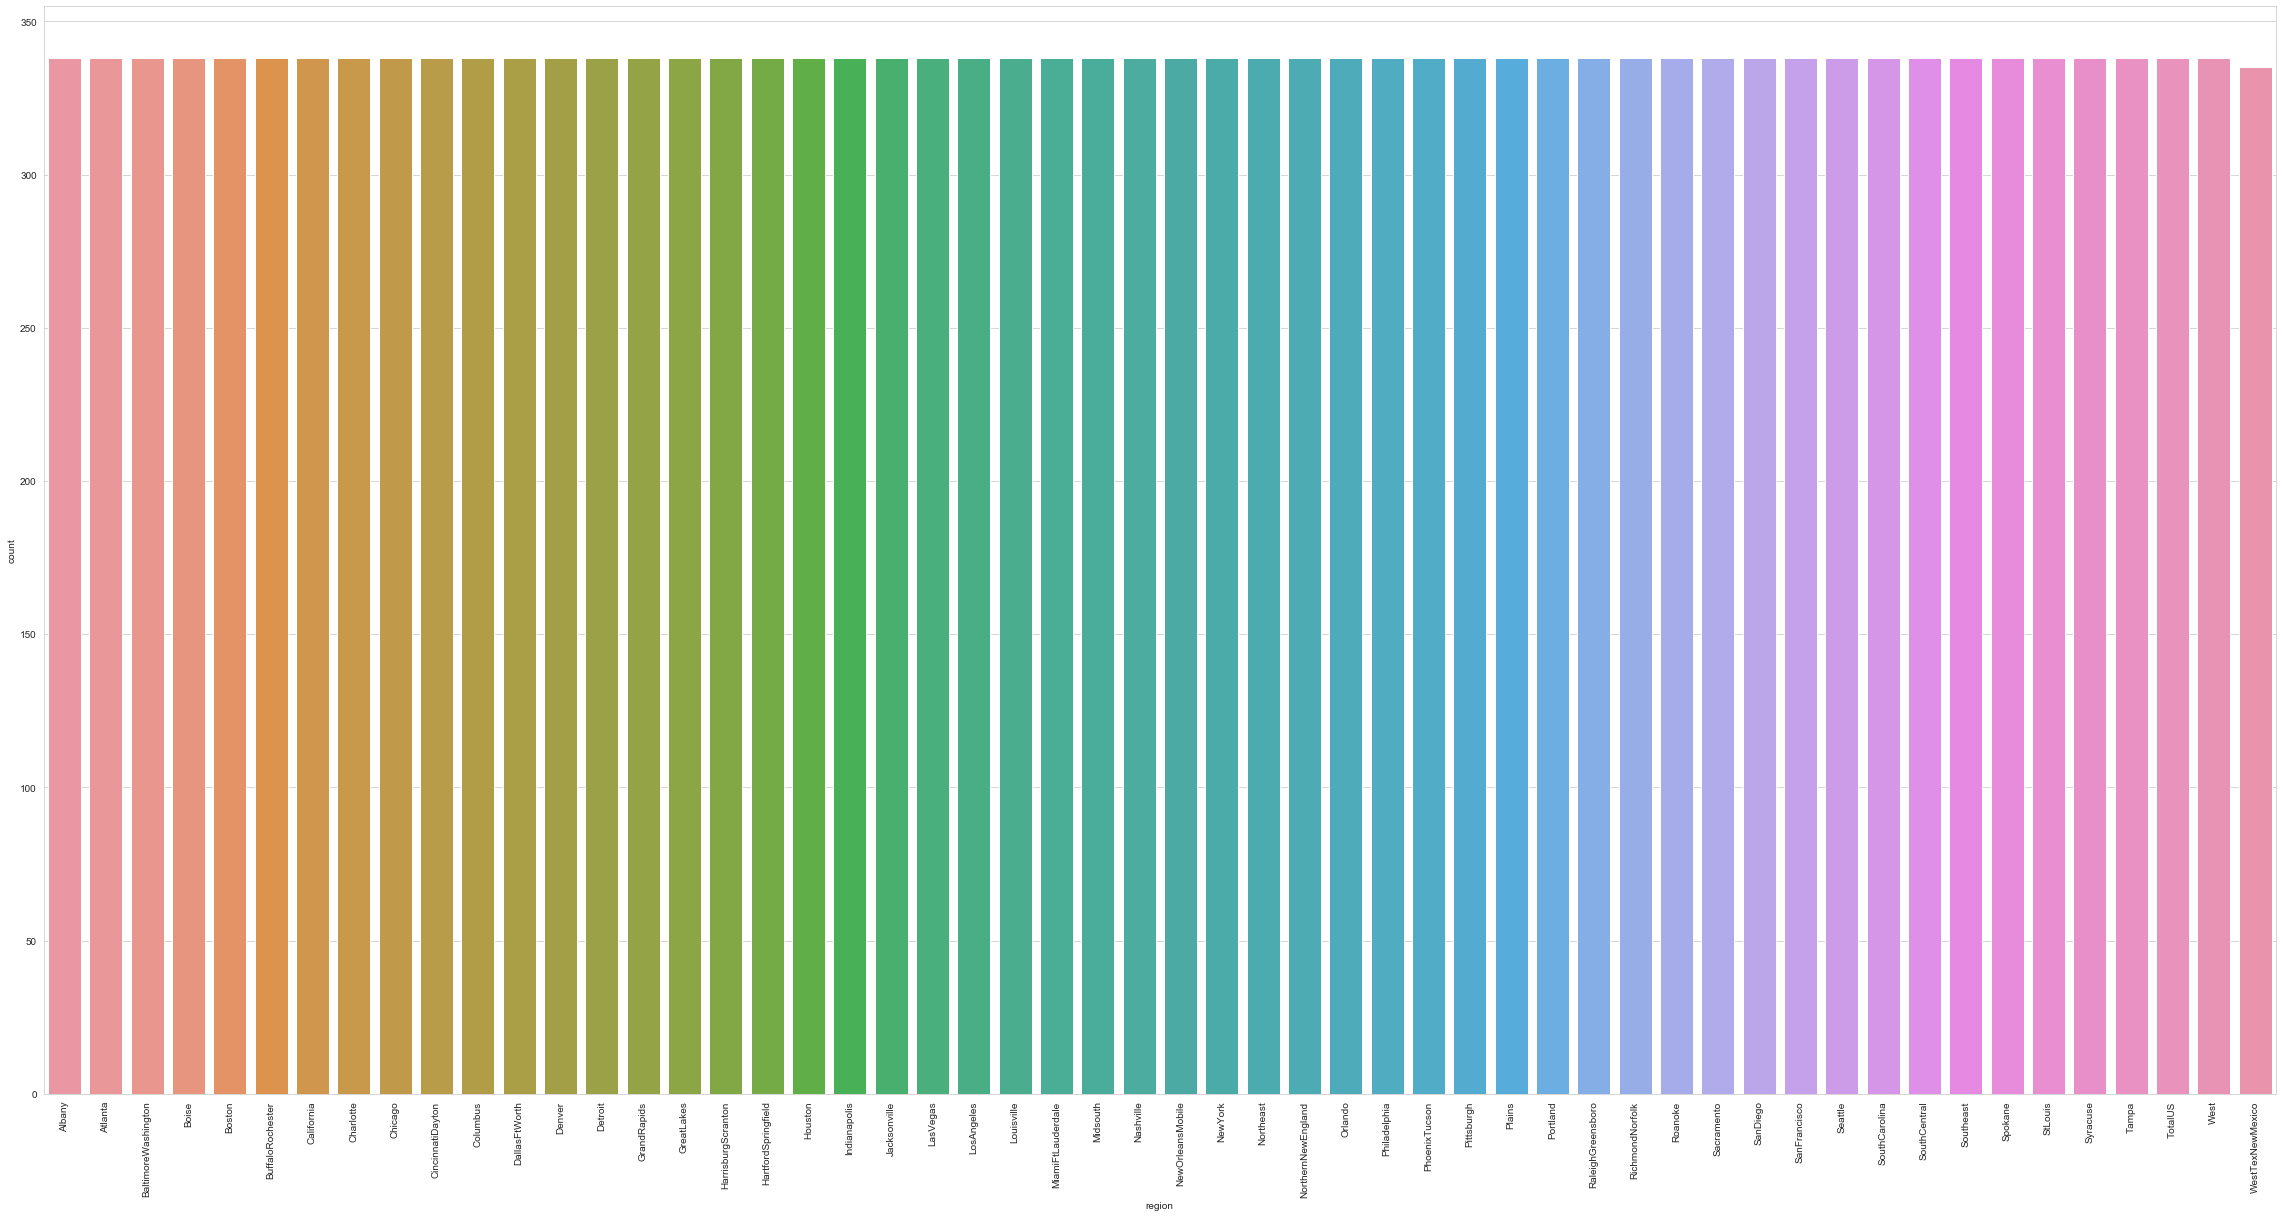

In [22]:
fig, ax = plt.subplots(figsize=(40, 20))

sns.set_style('whitegrid')
sns.countplot(x="region", data=data)
plt.xticks(rotation=90)

In [23]:
# Renaming size as per description

data.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'}, inplace=True) 

In [24]:
# Renaming columns to remove spaces and capitalize first letter
data.columns = data.columns.str.replace(' ','').map(lambda x : x[0].upper() + x[1:]) 
data.head(2)  # Preview of column header

,Date,AveragePrice,TotalVolume,PLU_4046,PLU_4225,PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


As we already know that there are 3 categorical columns

* 'Type' has on two values and distriburted uniformly

* 'Date' and 'Region' are highly cardinal, so we will work on how to proceed further...

In [25]:
data['Date'] = pd.to_datetime(data['Date'])    # Converting date to datetime type
data['Year'] = data['Year'].astype('object')   # Converting Year to object from numeric

Deriving some insightful columns from Date - like 'Season', 'Month', 'Quarter'

In [26]:
# Here using one Utility Function - To categorize Season based on date

def categorizing_seasons(date):
    month = date.month

    # Source - https://en.wikipedia.org/wiki/Season#Meteorological
    winter, spring, summer, autumn = ([12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11])
    if month in winter:
        return 'Winter'
    elif month in spring:
        return 'Spring'
    elif month in summer:
        return 'Summer'
    else:
        return 'Autumn'

In [27]:
data['Month'] = data['Date'].dt.month_name()             # Deriving Month from Date
data['Quarter'] = data['Date'].dt.quarter                # Deriving Qurter from Date
data['Season'] = data['Date'].map(categorizing_seasons)  # Deriving Season from Date

Analyzing how AveragePrice varies w.r.t Month, Quarter, Season.

In [28]:
# Utility Function - To update the variables as per data

def get_variables_from_data():
    # Target Variables
    y_column = 'AveragePrice'                                          
     
    # Categorical Feature variables 
    X_columns_cat = list(data.dtypes[data.dtypes.values == 'object'].index)  

    # Numeric Feature variables
    X_columns_num = list(data.dtypes[(data.dtypes.values != 'object') & (data.dtypes.index != y_column)].index)    
    
    # Feature variables
    X_columns = X_columns_num + X_columns_cat
    
    print('y_column:', y_column)
    print('X_columns: ',X_columns) 
    print('X_columns_num: ',X_columns_num) 
    print('X_columns_cat: ',X_columns_cat) 
    
    # Returning as a tuple
    return y_column, X_columns, X_columns_num, X_columns_cat


In [29]:
# Updating Variables

y_column, X_columns, X_columns_num, X_columns_cat = get_variables_from_data()

y_column: AveragePrice
X_columns:  ['Date', 'TotalVolume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Quarter', 'Type', 'Year', 'Region', 'Month', 'Season']
X_columns_num:  ['Date', 'TotalVolume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Quarter']
X_columns_cat:  ['Type', 'Year', 'Region', 'Month', 'Season']


In [30]:
# Understanding TotalVolume with respect to 'Month'

data.groupby('Month')[y_column].agg(['max', 'mean', 'min'])   

,max,mean,min
Month,,,
April,3.17,1.374380,0.51
August,3.04,1.512514,0.58
December,2.67,1.331112,0.49
February,2.59,1.274387,0.46
January,2.70,1.311019,0.51
July,2.75,1.462077,0.56
June,2.77,1.408964,0.52
March,3.05,1.332255,0.44
May,2.73,1.346601,0.55


In [31]:
# Understanding TotalVolume with respect to 'Quarter'

data.groupby('Quarter')[y_column].agg(['max', 'mean', 'min'])  

,max,mean,min
Quarter,,,
1,3.05,1.306605,0.44
2,3.17,1.375033,0.51
3,3.04,1.512913,0.56
4,3.25,1.458588,0.49


In [32]:
# Understanding TotalVolume with respect to 'Season'

data.groupby('Season')[y_column].agg(['max', 'mean', 'min'])  

,max,mean,min
Season,,,
Autumn,3.25,1.536147,0.58
Spring,3.17,1.349266,0.44
Summer,3.04,1.462572,0.52
Winter,2.70,1.304100,0.46


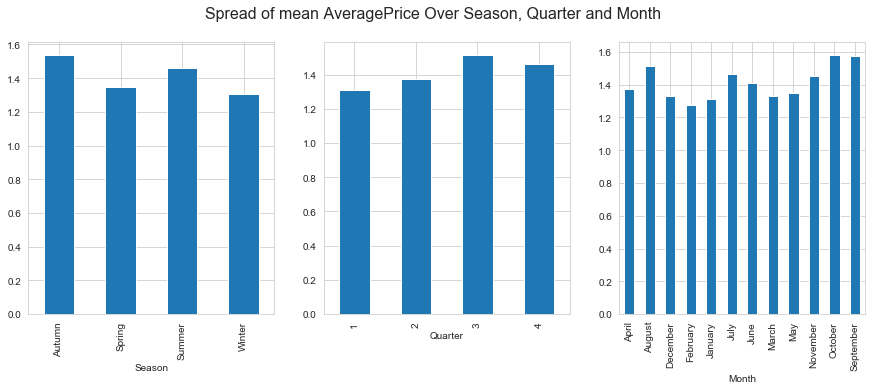

In [33]:
f, ax = plt.subplots(1, 3, figsize=(15,5))
f.suptitle('Spread of mean AveragePrice Over Season, Quarter and Month', fontsize=16)
data.groupby('Season')[y_column].mean().plot(kind='bar',ax=ax[0])
data.groupby('Quarter')[y_column].mean().plot(kind='bar',ax=ax[1])
data.groupby('Month')[y_column].mean().plot(kind='bar',ax=ax[2])


Observations

* Average price drops in the months of December, January, February, May, June, July
* No much varience in price w.r.t Quarter - So we can drop this column.
* In winters Avacado prices drops more than any other seasons - as seasons are correlated and gives more info we can drop   
  Season, Date and have Month column as an important feature.

In [34]:
# Preview of existing Feature columns

X_columns           

['Date',
 'TotalVolume',
 'PLU_4046',
 'PLU_4225',
 'PLU_4770',
 'TotalBags',
 'SmallBags',
 'LargeBags',
 'XLargeBags',
 'Quarter',
 'Type',
 'Year',
 'Region',
 'Month',
 'Season']

In [35]:
# Droping Data, Quarter and Season columns

data.drop(columns=['Date', 'Season', 'Quarter'], inplace=True)   

In [36]:
# Updating Variables

y_column, X_columns, X_columns_num, X_columns_cat = get_variables_from_data()

y_column: AveragePrice
X_columns:  ['TotalVolume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type', 'Year', 'Region', 'Month']
X_columns_num:  ['TotalVolume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']
X_columns_cat:  ['Type', 'Year', 'Region', 'Month']


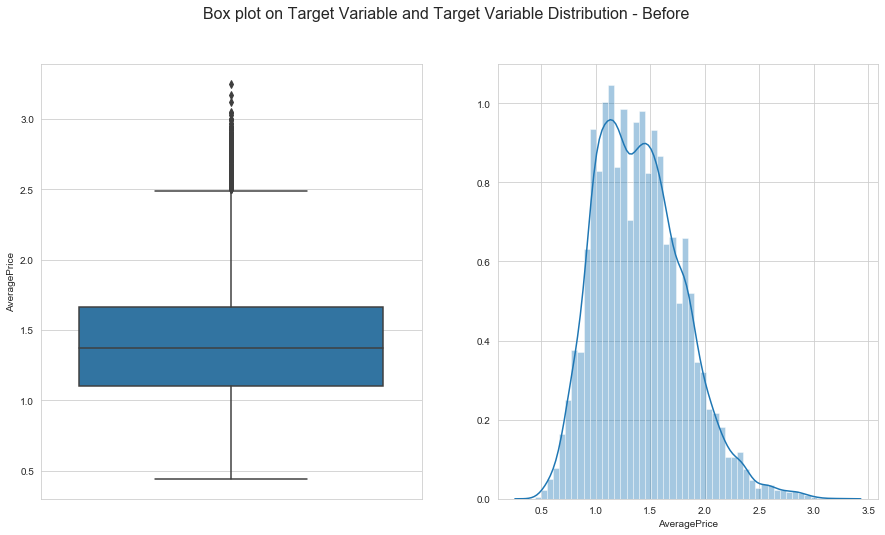

In [37]:
f, ax =  plt.subplots(1, 2, figsize=(15, 8))
f.suptitle('Box plot on Target Variable and Target Variable Distribution - Before', fontsize=16)
sns.boxplot(y=y_column, data=data, ax=ax[0]) # Box plot on TotalVolume before droping extreme values
sns.distplot(data[y_column], ax=ax[1])       # Distribution of Target Vaiable

In [38]:
# Checking mean|median and limiting data to 2 * (mean|median) - To eliminate extreme right values

data[y_column].describe()           

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

We will remove extreme values above avg price 2.8, this makes our TV symetric

In [39]:
# Droping records where price > 3

data.drop(data[data[y_column] > 2.8].index, inplace=True) 

In [40]:
 # Shape of data after droping few records
    
print(data.shape)                                        

(18193, 13)


In [41]:
data.sample(5)                                            

,AveragePrice,TotalVolume,PLU_4046,PLU_4225,PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region,Month
7185,1.66,4110305.09,302107.66,2678109.07,15192.54,1114895.82,951882.76,160311.39,2701.67,conventional,2017,Northeast,May
16241,2.07,90178.82,5734.05,28471.55,57.34,55915.88,55915.88,0.00,0.00,organic,2017,NewYork,September
13610,2.24,9520.79,781.53,3274.90,19.27,5445.09,5418.70,26.39,0.00,organic,2016,Philadelphia,September
6270,1.10,896083.20,122874.44,379022.88,10439.85,383746.03,99069.57,281790.90,2885.56,conventional,2017,Denver,August
5103,1.50,222378.08,97077.73,42624.62,9363.75,73311.98,39593.75,33718.23,0.00,conventional,2016,SouthCarolina,November


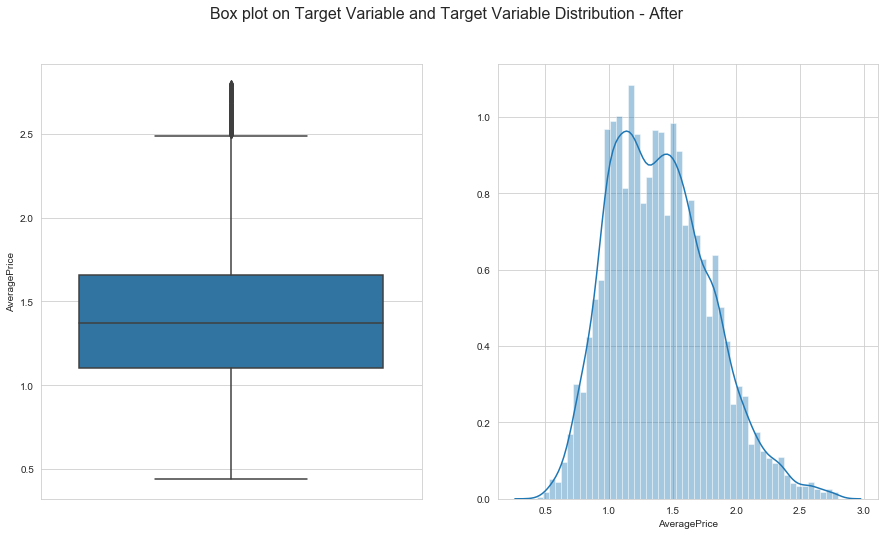

In [42]:
f, ax =  plt.subplots(1, 2, figsize=(15, 8))
f.suptitle('Box plot on Target Variable and Target Variable Distribution - After', fontsize=16)
sns.boxplot(y=y_column, data=data, ax=ax[0]) # Box plot on TV after droping extreme values
sns.distplot(data[y_column], ax=ax[1])       # Distribution of Target Vaiable

EDA - How Price are varying with respect to Region

Price and Type relation

Seperate X and y

- Do correlation and drop few columns
- Joint plot
- Dist Plot
- Linear relation amoing x and y

In [43]:
data.head()

,AveragePrice,TotalVolume,PLU_4046,PLU_4225,PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November


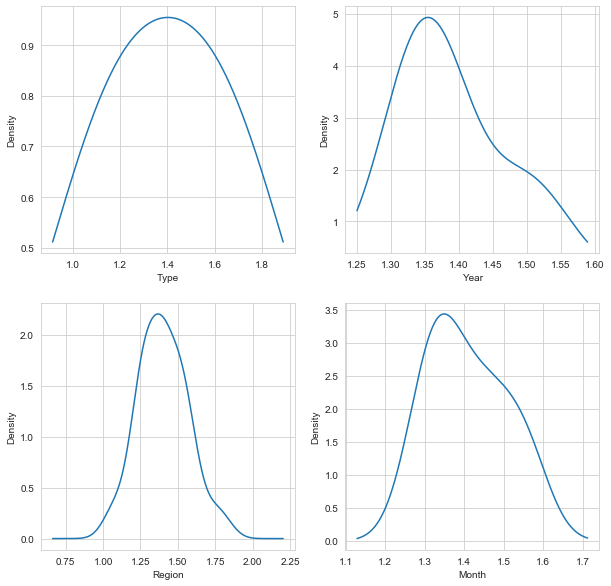

In [44]:
# Density of Mean Price with respect to Categorical columns

f, ax = plt.subplots(2,2, figsize=(10,10))
for x_var, subplot in zip(X_columns_cat, ax.flatten()):
    subplot.set_xlabel(x_var)
    data.groupby(x_var)[y_column].mean().plot(kind='kde', ax=subplot, label='Test')

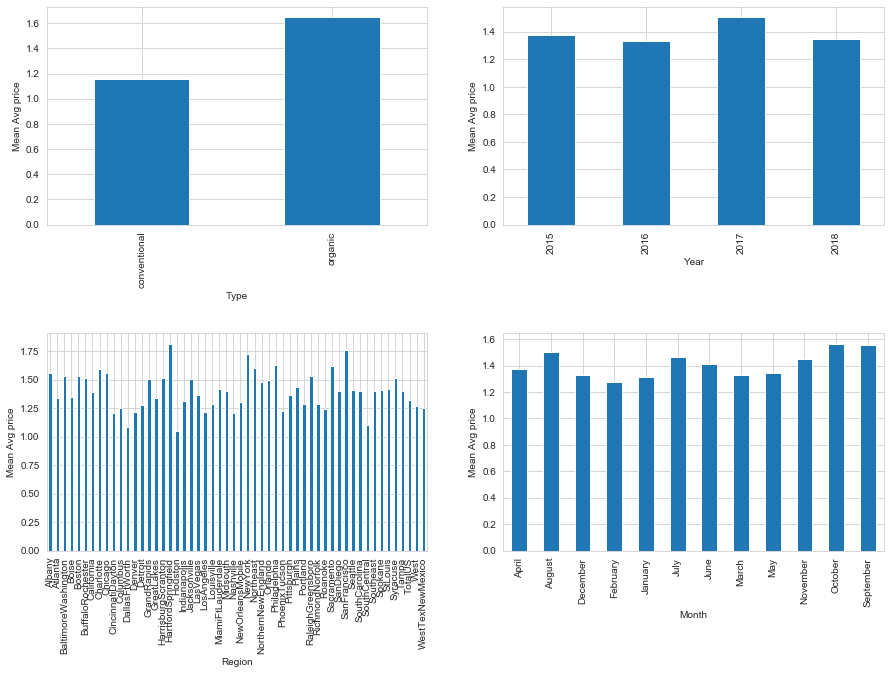

In [45]:
# Mean price with respect to categorical columns

f, ax = plt.subplots(2,2, figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for x_var, subplot in zip(X_columns_cat, ax.flatten()):
    subplot.set_xlabel(x_var)
    subplot.set_ylabel('Mean Avg price')
    data.groupby(x_var)[y_column].mean().plot(kind='bar', ax=subplot, label='Test')


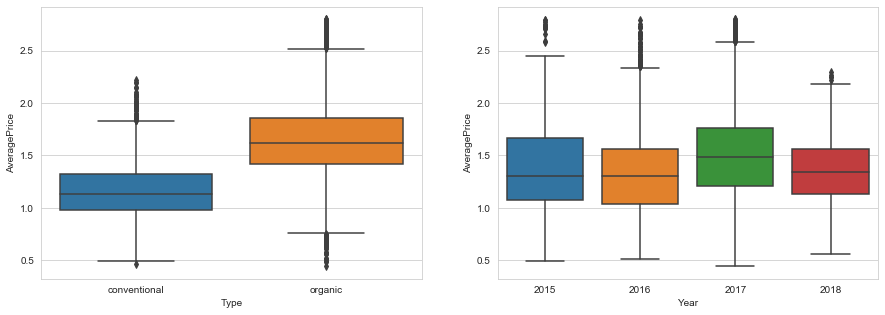

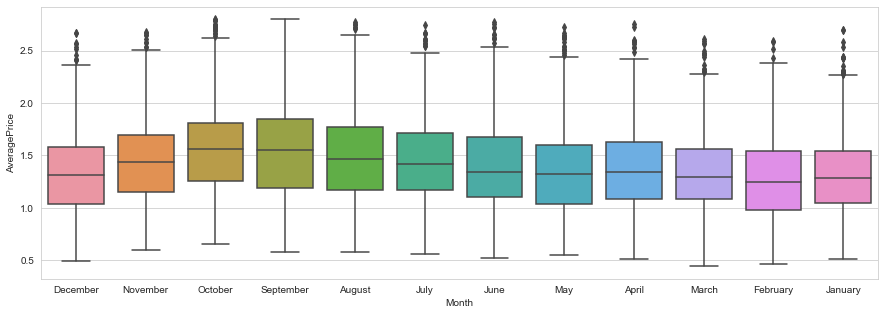

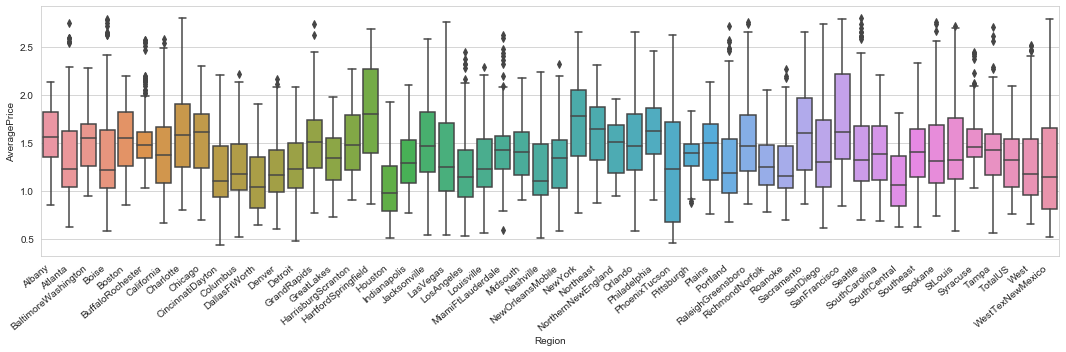

In [46]:
# Box plot to check Outliers in Categorical columns

f, ax = plt.subplots(1,2, figsize=(15,5))
for x_var, subplot in zip(X_columns_cat[0:2], ax.flatten()):
    sns.boxplot(data = data, x=x_var, y=y_column, ax=subplot)

f, ax = plt.subplots(1, figsize=(15,5))
sns.boxplot(data = data, x=X_columns_cat[-1], y=y_column, ax=ax)

f, ax = plt.subplots(1, figsize=(15,5))
sns.boxplot(data = data, x=X_columns_cat[2], y=y_column, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

We can see that there are some OUTLIERS present but these are not too extreme so we do not drop any record.

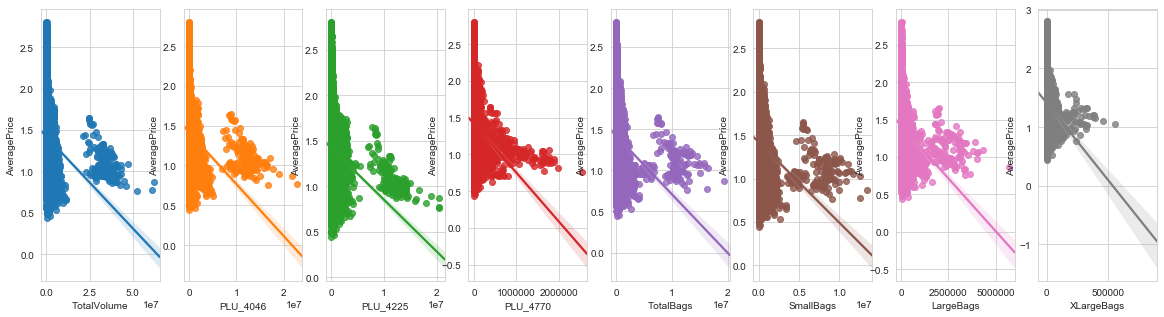

In [47]:
# Checking for relation of numeric columns with respect to Target Variable

f, ax = plt.subplots(1, len(X_columns_num), figsize=(20, 5))

for x_var, sp in zip(X_columns_num, ax.flatten()):
    sns.regplot(x=data[x_var], y=data[y_column], ax=sp)

#### Checking for No Multicollinearity

In [48]:
data[X_columns_num].corr()

,TotalVolume,PLU_4046,PLU_4225,PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags
TotalVolume,1.000000,0.977860,0.974176,0.872183,0.963041,0.967232,0.880623,0.747130
PLU_4046,0.977860,1.000000,0.926098,0.833364,0.920043,0.925267,0.838622,0.699343
PLU_4225,0.974176,0.926098,1.000000,0.887838,0.905771,0.916016,0.809988,0.688773
PLU_4770,0.872183,0.833364,0.887838,1.000000,0.792283,0.802703,0.698430,0.679826
TotalBags,0.963041,0.920043,0.905771,0.792283,1.000000,0.994334,0.943002,0.804212
SmallBags,0.967232,0.925267,0.916016,0.802703,0.994334,1.000000,0.902576,0.806825
LargeBags,0.880623,0.838622,0.809988,0.698430,0.943002,0.902576,1.000000,0.710828
XLargeBags,0.747130,0.699343,0.688773,0.679826,0.804212,0.806825,0.710828,1.000000


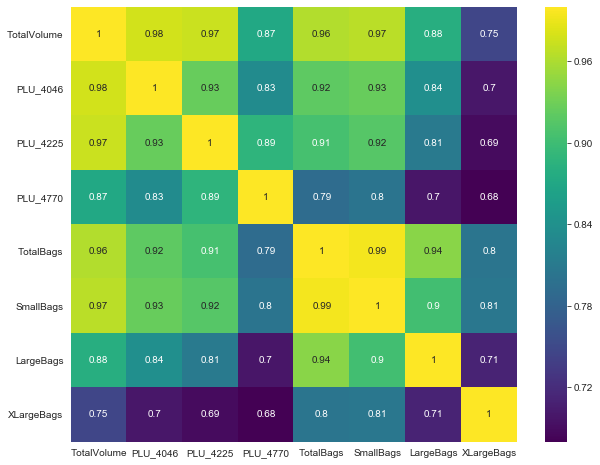

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(data[X_columns_num].corr(), annot=True, cmap='viridis')

So we can drop 'PLU_4046', 'PLU_4225', 'TotalBags', 'SmallBags' as they have very high Correlation

In [50]:
data.drop(columns=['PLU_4046', 'PLU_4225', 'TotalBags', 'SmallBags'], inplace=True)

In [51]:
data.head()

,AveragePrice,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,1.33,64236.62,48.16,93.25,0.0,conventional,2015,Albany,December
1,1.35,54876.98,58.33,97.49,0.0,conventional,2015,Albany,December
2,0.93,118220.22,130.50,103.14,0.0,conventional,2015,Albany,December
3,1.08,78992.15,72.58,133.76,0.0,conventional,2015,Albany,December
4,1.28,51039.60,75.78,197.69,0.0,conventional,2015,Albany,November


In [52]:
# Updating the Variables

y_column, X_columns, X_columns_num, X_columns_cat = get_variables_from_data()

y_column: AveragePrice
X_columns:  ['TotalVolume', 'PLU_4770', 'LargeBags', 'XLargeBags', 'Type', 'Year', 'Region', 'Month']
X_columns_num:  ['TotalVolume', 'PLU_4770', 'LargeBags', 'XLargeBags']
X_columns_cat:  ['Type', 'Year', 'Region', 'Month']


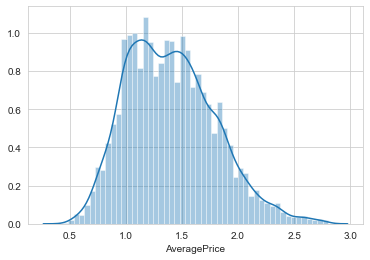

In [53]:
# Checking whether the Target Variable is Normally Distributed or Not

sns.distplot(data[y_column]) 

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


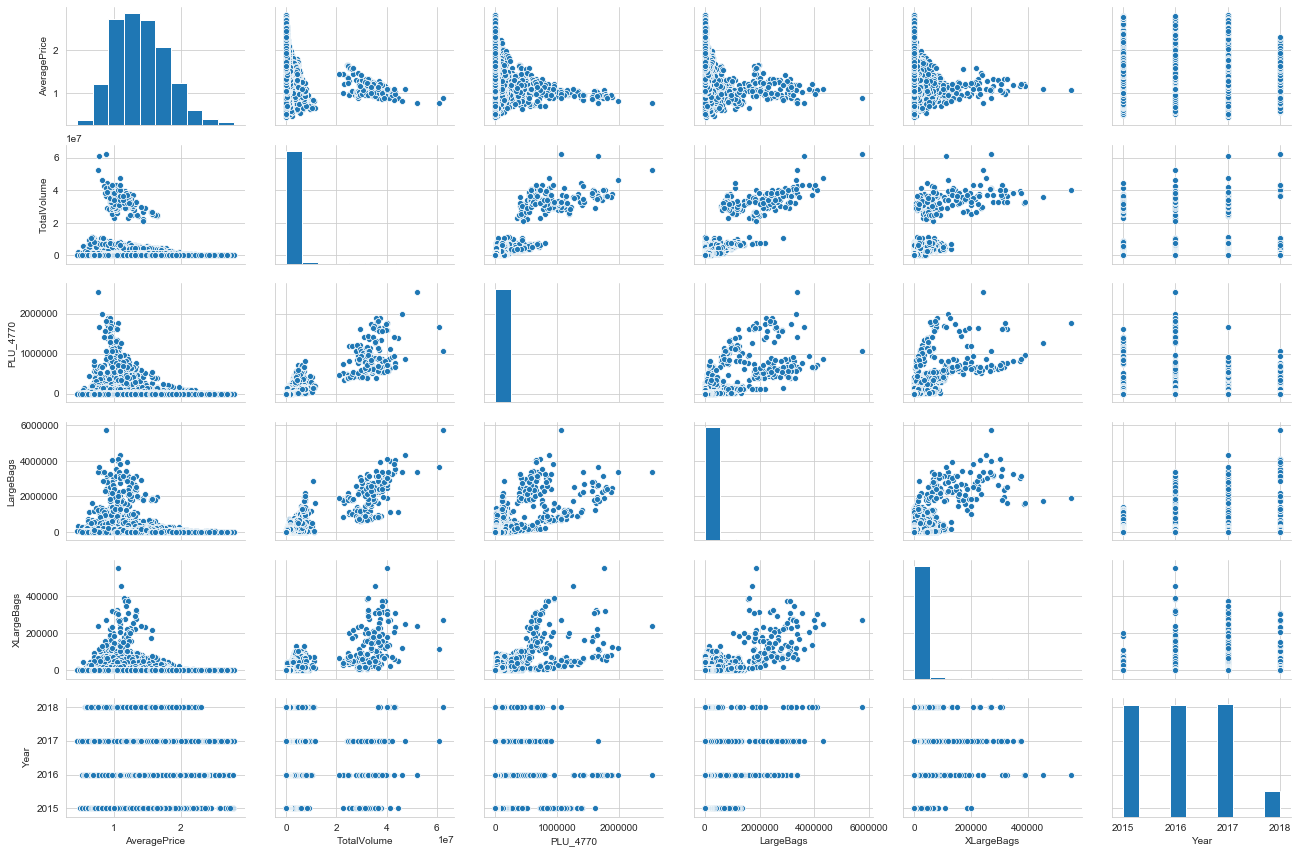

In [54]:
# Pair Plot of data
sns.pairplot(data, size = 2, aspect = 1.5)

### Modelling the Data

In [55]:
data.head(2)

,AveragePrice,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,1.33,64236.62,48.16,93.25,0.0,conventional,2015,Albany,December
1,1.35,54876.98,58.33,97.49,0.0,conventional,2015,Albany,December


In [56]:
X_columns

['TotalVolume',
 'PLU_4770',
 'LargeBags',
 'XLargeBags',
 'Type',
 'Year',
 'Region',
 'Month']

In [57]:
X = data[X_columns]
y = data[y_column]

In [58]:
X.shape

(18193, 8)

In [59]:
X.head()

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,64236.62,48.16,93.25,0.0,conventional,2015,Albany,December
1,54876.98,58.33,97.49,0.0,conventional,2015,Albany,December
2,118220.22,130.50,103.14,0.0,conventional,2015,Albany,December
3,78992.15,72.58,133.76,0.0,conventional,2015,Albany,December
4,51039.60,75.78,197.69,0.0,conventional,2015,Albany,November


In [60]:
y.shape

(18193,)

In [61]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

#### Now, we will split the whole data in Training Data and Testing Data

For that, we will use sklearn

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [64]:
# Reset index of split data sets

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [65]:
X_train.shape

(14554, 8)

In [66]:
X_train.head()

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,3938.37,0.00,40.00,0.00,organic,2016,Tampa,August
1,5094837.54,107753.58,341544.79,2239.59,conventional,2015,West,November
2,146103.34,110.54,629.20,0.00,conventional,2015,HarrisburgScranton,November
3,12275.26,53.05,366.60,0.00,organic,2017,RichmondNorfolk,October
4,52865.97,71.23,19822.36,0.00,conventional,2017,Louisville,October


In [67]:
X_test.shape

(3639, 8)

In [68]:
X_test.head()

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,398859.76,114.33,108538.55,0.00,conventional,2016,Orlando,December
1,1262932.78,2927.27,65166.34,0.00,conventional,2015,Houston,May
2,416298.84,13276.06,29.77,140.22,conventional,2015,Portland,December
3,57606.91,416.00,24496.54,0.00,organic,2016,Southeast,October
4,375225.76,1187.45,95.41,2212.30,conventional,2017,Sacramento,March


#### Scaling Numerical Fields using StandardScaler

In [69]:
# Numeric X_train
X_train_num = X_train[X_columns_num]   

# Numeric X_test
X_test_num = X_test[X_columns_num]         

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler().fit(X_train_num) 

In [72]:
 # Transforming train data
X_train_s = pd.DataFrame(scaler.transform(X_train_num), columns=X_columns_num) 

# Transforming test data
X_test_s = pd.DataFrame(scaler.transform(X_test_num), columns=X_columns_num)    

In [73]:
X_train_s.shape

(14554, 4)

In [74]:
X_train_s.head()

,TotalVolume,PLU_4770,LargeBags,XLargeBags
0,-0.244740,-0.214141,-0.223880,-0.173600
1,1.244762,0.819485,1.215824,-0.048843
2,-0.203145,-0.213081,-0.221396,-0.173600
3,-0.242300,-0.213632,-0.222503,-0.173600
4,-0.230424,-0.213458,-0.140482,-0.173600


In [75]:
X_test_s.shape

(3639, 4)

In [76]:
X_test_s.head()

,TotalVolume,PLU_4770,LargeBags,XLargeBags
0,-0.129193,-0.213045,0.233524,-0.173600
1,0.123619,-0.186061,0.050677,-0.173600
2,-0.124091,-0.086791,-0.223923,-0.165789
3,-0.229037,-0.210151,-0.120777,-0.173600
4,-0.136108,-0.202751,-0.223646,-0.050363


Scaling numerical fields using StandardScaler

In [77]:
X_train[X_columns_cat].head() 

,Type,Year,Region,Month
0,organic,2016,Tampa,August
1,conventional,2015,West,November
2,conventional,2015,HarrisburgScranton,November
3,organic,2017,RichmondNorfolk,October
4,conventional,2017,Louisville,October


As we know that there are 4 categorical features we will perform encoding on each feature

In [78]:
# One Hot Encoding on Type for Train set.

X_train_type_dummies = pd.get_dummies(X_train['Type'], prefix='Type', drop_first=True)
      

In [79]:
 # Shape of Dummies
    
print(X_train_type_dummies.shape)

(14554, 1)


In [80]:
 # Preview of Type Dummies 

X_train_type_dummies.head()  

,Type_organic
0,1
1,0
2,0
3,1
4,0


In [81]:
# Merging type dummies to Scaled Train set

X_train_s = pd.concat([X_train_s, X_train_type_dummies], 1)

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
 # Shape of merged train set

print(X_train_s.shape)

(14554, 5)


In [83]:
# Preview of merged train set

X_train_s.head() 

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic
0,-0.244740,-0.214141,-0.223880,-0.173600,1
1,1.244762,0.819485,1.215824,-0.048843,0
2,-0.203145,-0.213081,-0.221396,-0.173600,0
3,-0.242300,-0.213632,-0.222503,-0.173600,1
4,-0.230424,-0.213458,-0.140482,-0.173600,0


In [84]:
# One Hot Encoding on Type for Test set

X_test_type_dummies = pd.get_dummies(X_test['Type'], prefix='Type', drop_first=True)
    

In [85]:
# Shape of Dummies

print(X_test_type_dummies.shape)       

(3639, 1)


In [86]:
 # Preview of Type Dummies 
    
X_test_type_dummies.head()            

,Type_organic
0,0
1,0
2,0
3,1
4,0


In [87]:
 # Merging type dummies to Scaled test set
    
X_test_s = pd.concat([X_test_s, X_test_type_dummies], 1)  

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
print(X_test_s.shape)                                      

(3639, 5)


In [89]:
X_test_s.head()                                            

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic
0,-0.129193,-0.213045,0.233524,-0.173600,0
1,0.123619,-0.186061,0.050677,-0.173600,0
2,-0.124091,-0.086791,-0.223923,-0.165789,0
3,-0.229037,-0.210151,-0.120777,-0.173600,1
4,-0.136108,-0.202751,-0.223646,-0.050363,0


#### Label Encoding on Year for Train set

In [90]:
from sklearn.preprocessing import LabelEncoder         

In [91]:
# Fitting on train set

label_encoder = LabelEncoder().fit(X_train['Year'])    

In [92]:
X_train_year_dummies = pd.DataFrame(label_encoder.transform(X_train['Year']), columns=['Year'])

In [93]:
 # Shape of Transformed Year
    
print(X_train_year_dummies.shape)      

(14554, 1)


In [94]:
# Preview of Transformed Year 

X_train_year_dummies.head()             

,Year
0,1
1,0
2,0
3,2
4,2


In [95]:
# Merging type dummies to Scaled train set

X_train_s = pd.concat([X_train_s, X_train_year_dummies], 1)   

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
 # Shape of merged train set
    
print(X_train_s.shape)                                       

(14554, 6)


In [97]:
# Preview of merged train set

X_train_s.head()                                              

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year
0,-0.244740,-0.214141,-0.223880,-0.173600,1,1
1,1.244762,0.819485,1.215824,-0.048843,0,0
2,-0.203145,-0.213081,-0.221396,-0.173600,0,0
3,-0.242300,-0.213632,-0.222503,-0.173600,1,2
4,-0.230424,-0.213458,-0.140482,-0.173600,0,2


In [98]:
X_test_year_dummies = pd.DataFrame(label_encoder.transform(X_test['Year']), columns=['Year'])

In [99]:
 # Shape of Transformed Year
    
print(X_test_year_dummies.shape)      

(3639, 1)


In [100]:
# Preview of Transformed Year 

X_test_year_dummies.head()             

,Year
0,1
1,0
2,0
3,1
4,2


In [101]:
# Merging type dummies to Scaled test set

X_test_s = pd.concat([X_test_s, X_test_year_dummies], 1)   

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
# Shape of merged test set

print(X_test_s.shape)                                      

(3639, 6)


In [103]:
# Preview of merged test set

X_test_s.head()                                            

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year
0,-0.129193,-0.213045,0.233524,-0.173600,0,1
1,0.123619,-0.186061,0.050677,-0.173600,0,0
2,-0.124091,-0.086791,-0.223923,-0.165789,0,0
3,-0.229037,-0.210151,-0.120777,-0.173600,1,1
4,-0.136108,-0.202751,-0.223646,-0.050363,0,2


#### Label Encoding on Year for Train set.
                               
  

In [104]:
# Importing Target Encoder

from category_encoders import TargetEncoder 

In [105]:
# Fitting on train set

target_encoder_region = TargetEncoder().fit(X_train['Region'], y_train)  

In [106]:
X_train_region_dummies = target_encoder_region.transform(X_train['Region'])

In [107]:
print(X_train_region_dummies.shape)       

(14554, 1)


In [108]:
X_train_region_dummies.head()             

,Region
0,1.405393
1,1.277011
2,1.519046
3,1.290218
4,1.289126


In [109]:
# Merging region dummies to Scaled train set

X_train_s = pd.concat([X_train_s, X_train_region_dummies], 1)   

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
print(X_train_s.shape)                                          

(14554, 7)


In [111]:
X_train_s.head()

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region
0,-0.244740,-0.214141,-0.223880,-0.173600,1,1,1.405393
1,1.244762,0.819485,1.215824,-0.048843,0,0,1.277011
2,-0.203145,-0.213081,-0.221396,-0.173600,0,0,1.519046
3,-0.242300,-0.213632,-0.222503,-0.173600,1,2,1.290218
4,-0.230424,-0.213458,-0.140482,-0.173600,0,2,1.289126


In [112]:
X_test_region_dummies = target_encoder_region.transform(X_test['Region'])
print(X_test_region_dummies.shape)                    

(3639, 1)


In [113]:
X_test_region_dummies.head()

,Region
0,1.497100
1,1.053796
2,1.286667
3,1.400506
4,1.634144


In [114]:
 # Merging region dummies to Scaled train set
    
X_test_s = pd.concat([X_test_s, X_test_region_dummies], 1)    
print(X_test_s.shape)                                                                                          

(3639, 7)


C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
X_test_s.head()

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region
0,-0.129193,-0.213045,0.233524,-0.173600,0,1,1.497100
1,0.123619,-0.186061,0.050677,-0.173600,0,0,1.053796
2,-0.124091,-0.086791,-0.223923,-0.165789,0,0,1.286667
3,-0.229037,-0.210151,-0.120777,-0.173600,1,1,1.400506
4,-0.136108,-0.202751,-0.223646,-0.050363,0,2,1.634144


In [116]:
 # Fitting on train set for Month
    
target_encoder_month = TargetEncoder().fit(X_train['Month'], y_train)   

In [117]:
X_train_month_dummies = target_encoder_month.transform(X_train['Month'])
print(X_train_month_dummies.shape)       

(14554, 1)


In [118]:
X_train_month_dummies.head()             

,Month
0,1.505376
1,1.450355
2,1.450355
3,1.566992
4,1.566992


In [119]:
# Merging region dummies to Scaled train set

X_train_s = pd.concat([X_train_s, X_train_month_dummies], 1)    
print(X_train_s.shape)                                          


(14554, 8)


C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
X_train_s.head()

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region,Month
0,-0.244740,-0.214141,-0.223880,-0.173600,1,1,1.405393,1.505376
1,1.244762,0.819485,1.215824,-0.048843,0,0,1.277011,1.450355
2,-0.203145,-0.213081,-0.221396,-0.173600,0,0,1.519046,1.450355
3,-0.242300,-0.213632,-0.222503,-0.173600,1,2,1.290218,1.566992
4,-0.230424,-0.213458,-0.140482,-0.173600,0,2,1.289126,1.566992


In [121]:
X_test_month_dummies = target_encoder_month.transform(X_test['Month'])
print(X_test_month_dummies.shape)                    

(3639, 1)


In [122]:
X_test_month_dummies.head()

,Month
0,1.329709
1,1.354971
2,1.329709
3,1.566992
4,1.325027


In [123]:
 # Merging month dummies to Scaled train set
    
X_test_s = pd.concat([X_test_s, X_test_month_dummies], 1)     
print(X_test_s.shape)                                          

(3639, 8)


C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
X_test_s.head()

,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region,Month
0,-0.129193,-0.213045,0.233524,-0.173600,0,1,1.497100,1.329709
1,0.123619,-0.186061,0.050677,-0.173600,0,0,1.053796,1.354971
2,-0.124091,-0.086791,-0.223923,-0.165789,0,0,1.286667,1.329709
3,-0.229037,-0.210151,-0.120777,-0.173600,1,1,1.400506,1.566992
4,-0.136108,-0.202751,-0.223646,-0.050363,0,2,1.634144,1.325027


### Model Building

In [125]:
# Importing Models
from sklearn.linear_model import LinearRegression              
from sklearn.tree import DecisionTreeRegressor                 

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='la

In [126]:
# Creating our LinearRegression model and fitting the data into it.

linreg_model = LinearRegression()
linreg_model.fit(X_train_s, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
# Creating our DecisionTreeRegressor model and fitting the data into it.
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_s, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

#### Model Predictions

1. Predictions from LinearRegression Model - linreg_model

Predictions from `linreg_model` - TRAIN Set

In [128]:
 # Predicted Target Values for TRAIN set.
    
y_train_pred_lr = linreg_model.predict(X_train_s)    
print(y_train_pred_lr.shape)                        

(14554,)


In [129]:
 # Top 20 Predicted Target Values for TRAIN set.
    
y_train_pred_lr[:20]  

array([1.75720503, 1.00083486, 1.26561571, 1.76543123, 1.27502152,
       1.07023221, 0.80304776, 1.29150756, 1.81019634, 1.53145734,
       1.84931061, 1.16638752, 1.65620583, 1.21373509, 1.52906031,
       1.64964465, 1.52547816, 1.37040184, 1.70983702, 1.54517757])

Predictions from `linreg_model` - TEST Set

In [130]:
# Predicted Target Values for TEST set.

y_test_pred_lr = linreg_model.predict(X_test_s)     
print(y_test_pred_lr.shape)                                                       

(3639,)


In [131]:
 # Top 20 Predicted Target Values for TEST set.

y_test_pred_lr[:20]  

array([1.16108841, 0.69265754, 0.90070567, 1.819557  , 1.3518233 ,
       1.15133184, 1.64783298, 1.16987147, 1.35682039, 0.96841566,
       1.93794453, 1.22975418, 1.10488472, 1.1684988 , 0.82494541,
       1.55098348, 1.70517351, 1.67214618, 1.16465163, 1.66712775])

2. Predictions from DecisionTreeRegressor Model - dt_model

Predictions from `dt_model` - TRAIN Set

In [132]:
 # Predicted Target Values for TRAIN set.
    
y_train_pred_dt = dt_model.predict(X_train_s)        
print(y_train_pred_dt.shape)                          

(14554,)


In [133]:
  # Top 20 Predicted Target Values for TRAIN set.
    
y_train_pred_dt[:20]                                

array([1.39, 0.88, 1.17, 1.62, 1.98, 0.93, 0.84, 1.16, 1.93, 1.81, 1.95,
       1.17, 1.94, 1.53, 0.98, 1.26, 1.82, 0.98, 1.87, 1.44])

Predictions from `dt_model` - TEST Set

In [134]:
# Predicted Target Values for TEST set.

y_test_pred_dt = dt_model.predict(X_test_s)          
print(y_test_pred_dt.shape)                                                       

(3639,)


In [135]:
 # Top 20 Predicted Target Values for TEST set.

y_test_pred_dt[:20]   

array([0.82, 0.76, 1.16, 1.36, 1.39, 1.22, 1.46, 1.45, 0.99, 1.01, 2.73,
       1.25, 0.97, 0.81, 0.89, 1.56, 1.41, 2.32, 0.98, 1.57])